In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image

In [2]:
import os

base_dir = "../raw_data"

for root, dirs, files in os.walk(base_dir):
    print(root, ":", len(files))

../raw_data : 0
../raw_data/archive (1) : 0
../raw_data/archive (1)/contempt : 208
../raw_data/archive (1)/fear : 570
../raw_data/archive (1)/surprise : 775
../raw_data/archive (1)/sadness : 746
../raw_data/archive (1)/neutrality : 524
../raw_data/archive (1)/happiness : 1406
../raw_data/archive (1)/anger : 890
../raw_data/archive (1)/disgust : 439


In [9]:
import os
import pandas as pd

base_dir = "../raw_data/archive (1)"  # directly inside archive (1)

data = []
for label in os.listdir(base_dir):
    label_dir = os.path.join(base_dir, label)
    if os.path.isdir(label_dir):
        for file in os.listdir(label_dir):
            if os.path.isfile(os.path.join(label_dir, file)):
                data.append({
                    "filepath": os.path.join(label_dir, file),
                    "label": label
                })

df = pd.DataFrame(data)

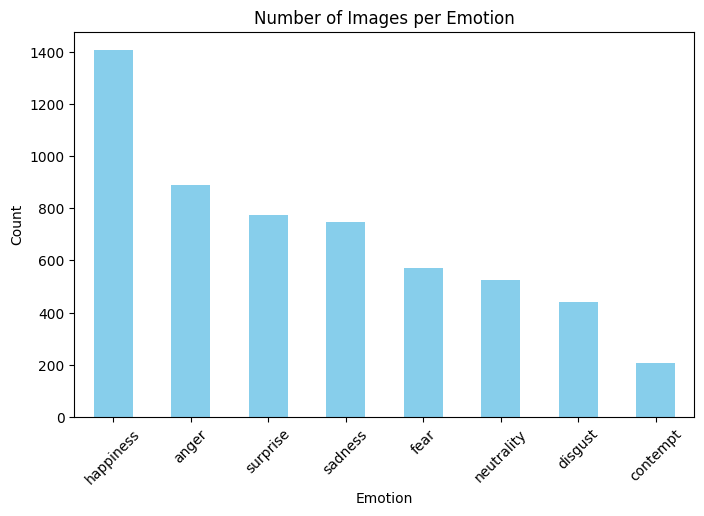

In [10]:
import matplotlib.pyplot as plt

df["label"].value_counts().plot(kind="bar", color="skyblue", figsize=(8,5))
plt.title("Number of Images per Emotion")
plt.ylabel("Count")
plt.xlabel("Emotion")
plt.xticks(rotation=45)
plt.show()

In [11]:
print(df["label"].value_counts())
print("\nPercentages:")
print(df["label"].value_counts(normalize=True) * 100)

label
happiness     1406
anger          890
surprise       775
sadness        746
fear           570
neutrality     524
disgust        439
contempt       208
Name: count, dtype: int64

Percentages:
label
happiness     25.296869
anger         16.012954
surprise      13.943865
sadness       13.422094
fear          10.255488
neutrality     9.427852
disgust        7.898525
contempt       3.742353
Name: proportion, dtype: float64


In [12]:
from PIL import Image

sizes = []
for fp in df["filepath"].sample(500):  # sample 500 for speed
    with Image.open(fp) as img:
        sizes.append(img.size)

size_df = pd.DataFrame(sizes, columns=["width", "height"])
print(size_df.describe())

       width  height
count  500.0   500.0
mean   224.0   224.0
std      0.0     0.0
min    224.0   224.0
25%    224.0   224.0
50%    224.0   224.0
75%    224.0   224.0
max    224.0   224.0
